In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


In [2]:
df = pd.read_csv('df_merge1.csv', delimiter=',') 

### Encodage avec OneHotEncoder

In [4]:
###########################################################
# Initialisation de la methode OneHotEncoder
###########################################################

encoder = OneHotEncoder(sparse_output=False) 

###########################################################
# Selection des variables à encoder
###########################################################

cols_to_encode = df.drop('grav', axis=1) 


###########################################################
# Encoder chaque colonne
###########################################################

for col in cols_to_encode:
    encoded_col = encoder.fit_transform(df[[col]])
    encoded_col_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out([col]))
    df = df.drop([col], axis=1)
    df = pd.concat([df, encoded_col_df], axis=1)


### Utilisation du model RandomForestClassifier

In [6]:
###########################################################
# Création du train_test_split
###########################################################

X = df.drop('grav', axis=1)  
y = df['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

###########################################################
# Initialisation du modèle RandomForest
###########################################################

rf = RandomForestClassifier(random_state=1)

###########################################################
# Entraînement du modèle
###########################################################

rf.fit(X_train, y_train)

###########################################################
# Prédiction sur les données de test
###########################################################

y_pred_rf = rf.predict(X_test)

###########################################################
# Évaluation des performances
###########################################################
print("RandomForestClassifier")
print("Précision : ", accuracy_score(y_test, y_pred_rf) * 100)
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf))


RandomForestClassifier
Précision :  66.10452464920837
Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.78      0.74     23841
           2       0.40      0.17      0.24      1065
           3       0.52      0.37      0.43      6998
           4       0.64      0.65      0.64     21404

    accuracy                           0.66     53308
   macro avg       0.57      0.49      0.51     53308
weighted avg       0.65      0.66      0.65     53308



### Diminution de la target de 4 à 2 classes

In [9]:
###########################################################
# Diminution de la target de 4 à 2 classes
###########################################################

df['grav'] = df['grav'].replace(4,1) #pas grave
df['grav'] = df['grav'].replace(3,2) #grave


### Réentrainement RandomForestClassifier avec 2 classes

In [11]:
###########################################################
# On redéfinit la target avec les 2 classes
###########################################################

X = df.drop('grav', axis=1)  
y = df['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


rf = RandomForestClassifier(random_state=1,)

###########################################################
# Réentrainement du modèle
###########################################################

rf.fit(X_train, y_train)

###########################################################
# Prédiction sur les données de test
###########################################################

y_pred_rf = rf.predict(X_test)

###########################################################
# Évaluation des performances
###########################################################

print("RandomForestClassifier")
print("Précision : ", accuracy_score(y_test, y_pred_rf) * 100) 
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf)) 


RandomForestClassifier
Précision :  86.82374127710662
Rapport de classification :
               precision    recall  f1-score   support

           1       0.89      0.96      0.92     45245
           2       0.61      0.37      0.46      8063

    accuracy                           0.87     53308
   macro avg       0.75      0.66      0.69     53308
weighted avg       0.85      0.87      0.85     53308



### Visualation par importance avec RandomForestClassifier et 2 classes

               Feature  Importance
9              secu1_1    0.049216
10             secu1_2    0.044717
47            vma_80.0    0.030723
46            vma_50.0    0.028948
32            circ_2.0    0.023552
22            choc_1.0    0.021990
60           mois_10.0    0.021627
59            mois_9.0    0.020484
14  années_1974 - 1999    0.020120
15  années_2000 - 2023    0.019843


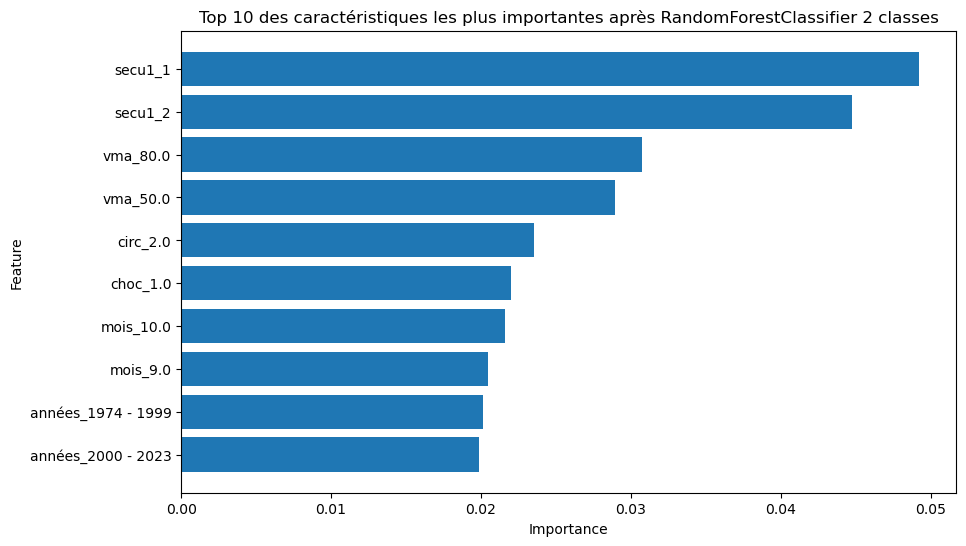

In [12]:
# Extraire les importances des caractéristiques après oversampling
importances = rf.feature_importances_

# Créer un DataFrame pour faciliter la visualisation
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Trier par importance décroissante
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Afficher les 10 premières caractéristiques les plus importantes
print(feature_df.head(10))

# Visualisation avec un graphique horizontal
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'][:10], feature_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 des caractéristiques les plus importantes après RandomForestClassifier 2 classes')
plt.gca().invert_yaxis()  # Inverser l'axe des ordonnées pour afficher la plus importante en haut
plt.show()


### Ajustement du poid des classes grâce à l'hyperparamètre class_weight='balanced'

In [14]:
###########################################################
# On redéfinit le X et le Y
###########################################################

X = df.drop('grav', axis=1)
y = df['grav']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


rf = RandomForestClassifier(random_state=1, class_weight='balanced')

###########################################################
# Réentrainement du modèle
###########################################################

rf.fit(X_train, y_train)

###########################################################
# Prédiction sur les données de test
###########################################################

y_pred_rf = rf.predict(X_test)

###########################################################
# Évaluation des performances
###########################################################

print("RandomForestClassifier en ajustant le poids des classes")
print("Précision : ", accuracy_score(y_test, y_pred_rf) * 100) 
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf)) 


RandomForestClassifier en ajustant le poids des classes
Précision :  83.12448412996173
Rapport de classification :
               precision    recall  f1-score   support

           1       0.91      0.88      0.90     45245
           2       0.45      0.53      0.49      8063

    accuracy                           0.83     53308
   macro avg       0.68      0.71      0.69     53308
weighted avg       0.84      0.83      0.84     53308



### Visualation par importance après l'hyperparamètre class_weight='balanced'

               Feature  Importance
9              secu1_1    0.085757
10             secu1_2    0.048743
46            vma_50.0    0.041424
47            vma_80.0    0.032357
32            circ_2.0    0.027645
31            circ_1.0    0.020697
8              secu1_0    0.019828
22            choc_1.0    0.019670
14  années_1974 - 1999    0.019590
19           catv_22.0    0.019087


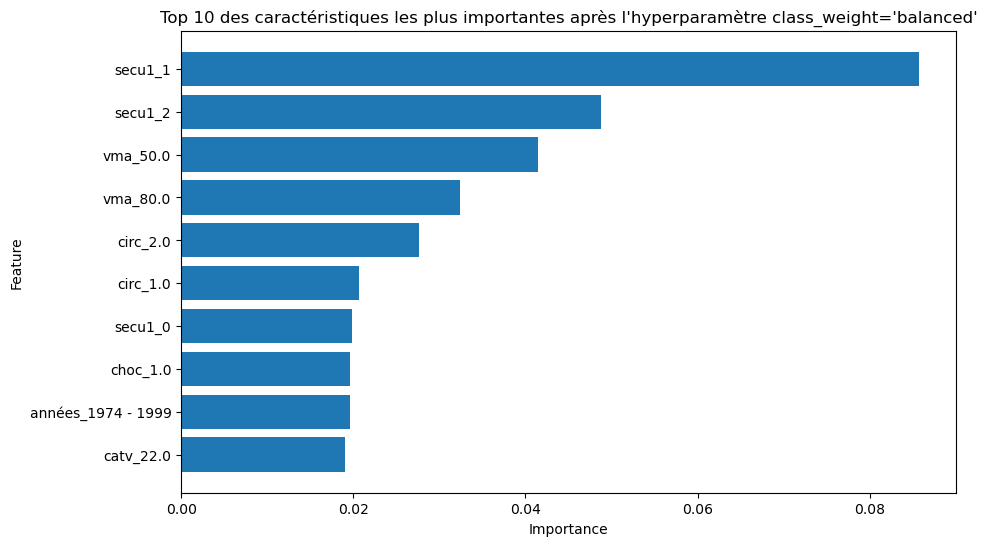

In [16]:

importances = rf.feature_importances_

# Créer un DataFrame pour faciliter la visualisation
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Trier par importance décroissante
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Afficher les 10 premières caractéristiques les plus importantes
print(feature_df.head(10))

# Visualisation avec un graphique horizontal
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'][:10], feature_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Top 10 des caractéristiques les plus importantes après l'hyperparamètre class_weight='balanced'")
plt.gca().invert_yaxis()  # Inverser l'axe des ordonnées pour afficher la plus importante en haut
plt.show()


### Utilisation de UnderSampling

In [18]:
###########################################################
# Définir X et y
###########################################################

X = df.drop('grav', axis=1)  
y = df['grav']

###########################################################
# Initialisation du RandomUnderSampler
###########################################################

rus = RandomUnderSampler(sampling_strategy='auto', random_state=1)

###########################################################
# Appliquer l'undersampling
###########################################################

X_rus, y_rus = rus.fit_resample(X, y)

###########################################################
# Création du train_test_split pour les données rééchantillonnées
###########################################################

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=1)

###########################################################
# Entraînement sur les données rééchantillonnées
###########################################################

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

###########################################################
# Prédiction sur les données de test
###########################################################

y_pred_rf = rf.predict(X_test)

###########################################################
# Vérifier la nouvelle répartition des classes
###########################################################

print("Répartition après undersampling:", Counter(y_rus))

###########################################################
# Évaluation des performances
###########################################################

print("RandomForestClassifier après undersampling")
print("Précision : ", accuracy_score(y_test, y_pred_rf) * 100)
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf))


Répartition après undersampling: Counter({1: 40749, 2: 40749})
RandomForestClassifier après undersampling
Précision :  76.28220858895706
Rapport de classification :
               precision    recall  f1-score   support

           1       0.78      0.74      0.76      8175
           2       0.75      0.79      0.77      8125

    accuracy                           0.76     16300
   macro avg       0.76      0.76      0.76     16300
weighted avg       0.76      0.76      0.76     16300



### Visualation par importance après undersampling

               Feature  Importance
9              secu1_1    0.082608
10             secu1_2    0.045651
46            vma_50.0    0.038099
47            vma_80.0    0.034122
32            circ_2.0    0.027689
8              secu1_0    0.020407
22            choc_1.0    0.020114
14  années_1974 - 1999    0.020110
31            circ_1.0    0.019616
60           mois_10.0    0.018841


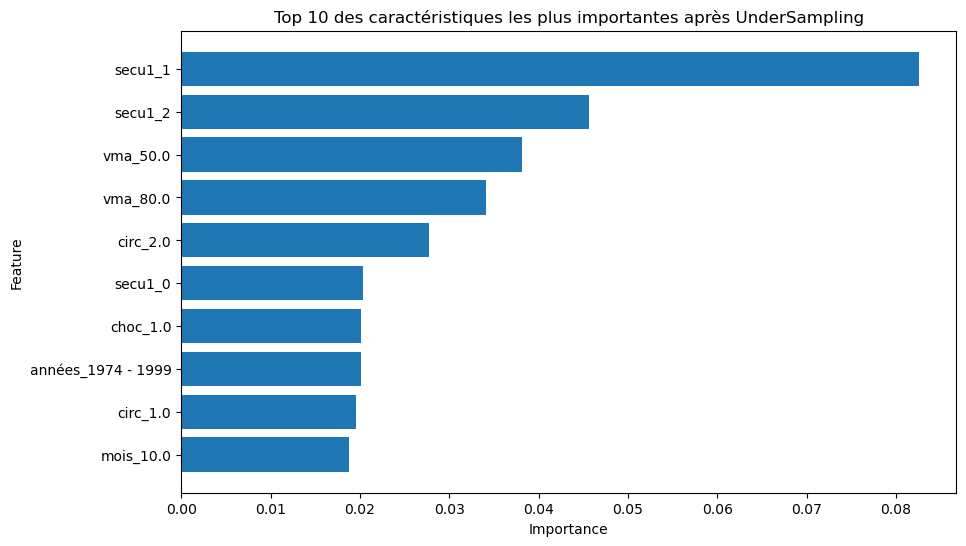

In [20]:

importances = rf.feature_importances_

# Créer un DataFrame pour faciliter la visualisation
features = X_train.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Trier par importance décroissante
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Afficher les 10 premières caractéristiques les plus importantes
print(feature_df.head(10))

# Visualisation avec un graphique horizontal
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'][:10], feature_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 des caractéristiques les plus importantes après UnderSampling')
plt.gca().invert_yaxis()  # Inverser l'axe des ordonnées pour afficher la plus importante en haut
plt.show()


###########################################################
# Sélections des 10 premières variables
###########################################################

df = df[['grav','secu1_1','secu1_2','vma_80.0','vma_50.0','mois_10.0','choc_1.0','circ_2.0','mois_9.0','catv_7.0','mois_7.0']]
